# Video library and YouTube

This page shows stats about the video library and OLS YouTube

In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
import yt_dlp

from pathlib import Path

## Video library

The video library contains available videos from talks in Open Seeds cohort calls. 

In [2]:
baseurl = "https://raw.githubusercontent.com/open-life-science/open-life-science.github.io/main/_data/artifacts/openseeds/"
library_df = pd.read_csv(f"{baseurl}library.csv", index_col=0, na_filter= False)

Number of talks

In [3]:
len(library_df)

233

### Speakers

In [4]:
speaker_df = (
    library_df
    .groupby(by="speakers")
    .count()
    .drop(columns = ["title", "date", "cohort", "tag", "subtag", "recording"])
    .rename(columns = {"slides": "Total"})
)

Number of speakers

In [5]:
len(speaker_df)

116

Mean number of talks per speaker

In [6]:
speaker_df["Total"].mean()

2.0086206896551726

Median number of talks per speaker

In [7]:
speaker_df["Total"].median()

1.0

Text(0.5, 0, 'Number of talks')

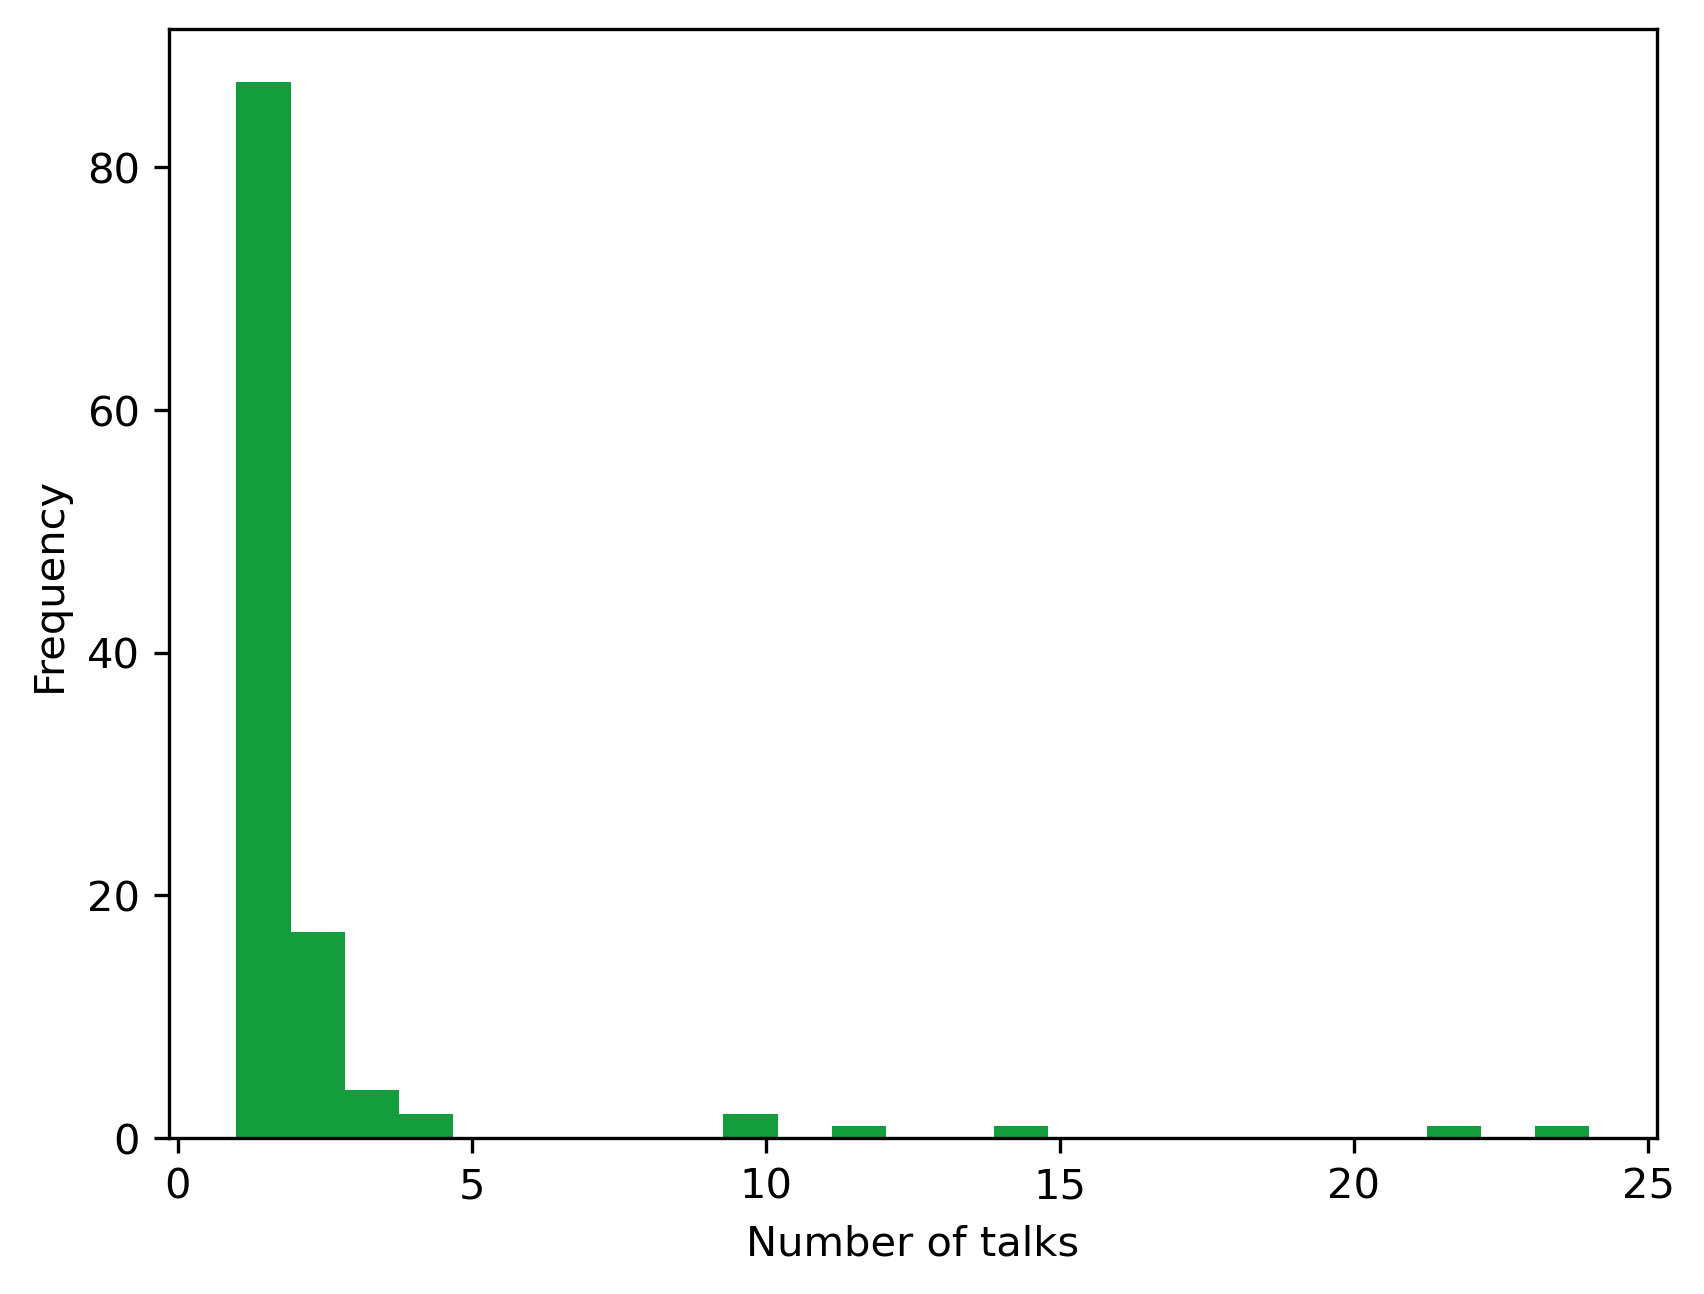

In [8]:
fig, ax = plt.subplots()
fig.set_dpi(300)
speaker_df.plot.hist(
    bins=25, ax=ax, legend=False, color="#139D3D"
)
plt.xlabel('Number of talks')

### Tags and subtags

In [9]:
tag_df = (
    library_df
    .groupby(["tag", "subtag"])
    .count()
    .drop(columns=["title", "date", "cohort", "slides", "speakers"])
    .rename(columns={"recording": "total"})
    .rename(columns=str.capitalize)
)
tag_df

Total
tag                                      subtag                                        
Not sorted                               Not tagged                                   5
Open Leadership                          Open Leadership in Practice                 30
Open Life Science                        OLS Introduction                            12
Open Science                             Open Access Publication                      8
                                         Open Data                                   14
                                         Open Educational Resources                   7
                                         Open Engagement of Social Actors             7
                                         Open Evaluation                              5
                                         Open Hardware                                6
                                         Open Science Infrastructures                 3
                                         Open Science Introduction                    3
                                         Open Source Software                        16
                                         Openness to Diversity of Knowledge           3
Project, Community & Personal Management Agile & Iteractive Project Management        6
                                         Ally Skills for Open Leaders                 4
                                         Community Design for Inclusivity             1
                                         Community Interactions                       6
                                         Equity, Diversity and Inclusion (EDI)        6
                                         Mountain of Engagement                       8
                                         Personal Ecology                             8
                                         Personas & Pathways                          7
Tooling for Collaboration                Code Review                                  3
                                         Code of Conduct                              8
                                         GitHub Introduction                          6
                                         Good Coding Practices                        3
                                         Open Licensing                               8
                                         Package Management                           1
                                         README                                       8
                                         Setting up a project                         3
Tooling for Project Design               Open Canvas                                 13
                                         Project Roadmapping                         13
                                         Tooling for Project Design Introduction      2

## YouTube stats

All videos from Open Seeds calls are uploaded on the [OLS YouTube channel](https://www.youtube.com/c/OpenLifeSci) 

In [10]:
%%capture
ydl_opts = {}
URL = "https://www.youtube.com/c/OpenLifeSci"
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info = ydl.extract_info(URL, download=False)
    # ydl.sanitize_info makes the info json-serializable
    channel_content = ydl.sanitize_info(info)

# extract video information
videos = []
for v in channel_content['entries'][0]['entries']:
    videos.append({key:v[key] for key in ['title', 'duration', 'view_count']})

yt_stat_df = (
    pd.DataFrame(videos)
    .assign(Duration=lambda df: df.duration/60)
    .drop(columns=["duration"])
    .rename(columns=str.capitalize)
)

Number of videos on the YouTube channel

In [11]:
len(yt_stat_df)

156

Number of videos of the Open Seeds calls

In [12]:
openseeds_yt_df = yt_stat_df.query("Title.str.contains('OLS-')",engine="python")
len(openseeds_yt_df)

73

### Duration

Number of hours of Open Seeds videos on the YouTube channel

In [13]:
sum(openseeds_yt_df.Duration)/60

76.99694444444444

Mean duration (minutes) of Open Seeds videos

In [14]:
openseeds_yt_df.Duration.mean()

63.2851598173516

Longest and shortest Open Seeds videos

In [15]:
openseeds_yt_df.sort_values("Duration", ascending=False)

,Title,View_count,Duration
63,OLS-4 Week 06 - Open Science I: Project Develo...,66,105.883333
123,OLS-3 graduation session 3,80,103.933333
2,OLS-8: Open Leadership in Practice,38,93.233333
0,OLS-8 - Week 10: Open Science Garden II,26,92.083333
50,OLS-5 Week 06:Open science I: Project Developm...,91,86.066667
...,...,...,...
29,OLS-6: Week 13 - Personal Ecology & Social hour,31,24.183333
58,OLS-4 Week 13 - Self Care and Personal Ecology,38,14.866667
45,OLS-5 Week 13 - Self-care & Social call [Skill...,42,12.816667
67,Creating an issue on OLS-4 repository,79,2.766667


### Views

Total number of view of the Open Seeds videos on the YouTube channel

In [16]:
sum(openseeds_yt_df.View_count)

6496

Mean number of views (minutes) per Open Seeds videos

In [17]:
openseeds_yt_df.View_count.mean()

88.98630136986301

Videos most and least viewed Open Seeds videos

In [18]:
openseeds_yt_df.sort_values("View_count", ascending=False)

,Title,View_count,Duration
134,OLS-3 Application Launch Webinar and Q&A - J...,834,38.100000
30,OLS-7 cohort launch application webinar,381,34.650000
133,OLS-3 Week 2 Cohort call 1: Welcome to Open Li...,229,63.850000
138,[OLS-2] Cohort call 6 - week 10 - Open Science...,185,69.916667
152,OLS-1 - Week 2 - Cohort Call 1 - Welcome to Op...,171,56.616667
...,...,...,...
6,"OLS-8, Week 3: Welcome to Open Seeds & Tooling...",27,63.950000
0,OLS-8 - Week 10: Open Science Garden II,26,92.083333
46,OLS-5 Week 12 - Designing & Empowering for inc...,24,59.416667
59,OLS-4 Week 12 - Diversity and Inclusion & Ally...,22,54.933333
